<a href="https://colab.research.google.com/github/monikabuss/ISYS5002-2024-semester2/blob/main/Code_Development_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Assignment 2: Analysis of Cardiovascular Disease Risk
The process of problemsolving can be broken down into six steps:
1.	State the problem clearly (In Business Report)
2.	Describe the input and output (In Business Report)
3.	Work a simple example by hand
4.	Develop an algorithm/pseudocode
5.	Convert to Python
6.	Test solution with a variety of data


##3. Work a simple example by hand
To solve the problem, one would have to look into different factors such as democraphic factor (gender, age), clinical factors (cholesterol, glucose levels, blood pressure) and lifestyle factors (smoking, alcohol consumption, physical activity). Based on these different factors, one must look into different combinations of these factors, and that could look like this:

1. If you smoke (lifestyle) and you are in your twenties (demographic), then your patters would be different, than if your life looked like this:

2. If you are in your sixties (demographic) and you have high blood pressure (clinical), then your cardiovascular health is different from a eprson with the following combination:

3. If you are a boy (demographic), you smoke (lifestyle) and you have low bloodpressure), then your cardiovascular health will look different from:

4. If you are a girl in your mid-thirtees (demographics), you don´t drink alcohol (lifestyle) and you have low colesterol (clinical).

##4. Develop an algorithm/pseudocode

#Input:

Get the age, the gender, the height, the weight, bloodpressure, cholesterol level, glucose level, smoke status, alcohol consumption status, activity status and cardiovascular desease presence.

-

#Process:

Get the age of the individual (in days)

Get the gender of the individual (1: female, 2: male)

Get the height of the individual (in cm)

Get the weight of th individual (in kg)

Does the individual have Systolic blood pressure (ap_hi) or Diastolic bloodpressure (ap_lo)?

Get the colesterol level (1: normal, 2: above normal, 3: well above normal)

Get the glucose level (1: normal, 2: above normal, 3: well above normal)

Get smoke status (0: non-smoker, 1: smoker)

Get alcohol consumption status (0: non-drinker, 1: drinker)

Get physical activity status (0: inactive, 1: active)

Get cardiovascular disease presence (0: no disease, 1: disease)

-

#Output:

Analyse different combinations of factors influence cardiovascular disease outcomes.

Select and analyse combinations from three groups: Demographic (age, gender), Clinical (cholesterol, glucose and blood pressure) and lifestyle (smoking, activity status and alcohol consumption).





##5. Convert to Python

###Import the necessary libraries

In [1]:
#Import the necessary libraries
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import csv

###Load the dataset and inspect it
The database "cardiohealth.db" is given. Now we need to access the database by creating a connection and create a cursor object.

In [2]:
#create a connection object to the uploaded database cardiohealth.db
conn = sql.connect('cardiohealth.db')

#create a cursor object to execute SQL queries against a database
cur = conn.cursor()

First, we need to inspect the database and see what tables are given:

In [3]:
#inspect what is given, looking for tables
sql='''
SELECT name FROM sqlite_master WHERE type='table';
'''
cur.execute(sql)
cur.fetchall()

[('medical_examination',)]

The database "cardiohealth.db" contains one table which is called "medical_examination".
Now we have to inspect the table to see what details are given.

In [4]:
#inspecting the details of the table 'medical_examination'
sql='''
PRAGMA table_info('medical_examination');
'''
cur.execute(sql)
cur.fetchall()

[(0, 'id', 'INTEGER', 0, None, 0),
 (1, 'age', 'INTEGER', 0, None, 0),
 (2, 'gender', 'INTEGER', 0, None, 0),
 (3, 'height', 'INTEGER', 0, None, 0),
 (4, 'weight', 'REAL', 0, None, 0),
 (5, 'ap_hi', 'INTEGER', 0, None, 0),
 (6, 'ap_lo', 'INTEGER', 0, None, 0),
 (7, 'cholesterol', 'INTEGER', 0, None, 0),
 (8, 'gluc', 'INTEGER', 0, None, 0),
 (9, 'smoke', 'INTEGER', 0, None, 0),
 (10, 'alco', 'INTEGER', 0, None, 0),
 (11, 'active', 'INTEGER', 0, None, 0),
 (12, 'cardio', 'INTEGER', 0, None, 0)]

The table "medical_examination" contains 13 attributes. Since the assignment taks does not contain height and weight in the factor groups, we do not include them in the med_ex_df dataframe in the following.


In [5]:
#put 'medical_exmaination' into dataframe, only what is relevant for later (not height and weight since we dont need the BMI)
sql='''
SELECT id, age, gender, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio from medical_examination;
'''
# Load the data into a DataFrame
med_ex_df = pd.read_sql_query(sql, conn)

After every session the connection must be closed:

In [6]:
#Close the connection
#The connection must be closed at the end of the session

conn.close()

###Explore the data
Now we want to see how the dataframe looks like, we look at the first 10 rows.

In [7]:
#show the first 10 rows of the dataframe
med_ex_df.head(10)

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,110,80,1,1,0,0,1,0
1,1,20228,1,140,90,3,1,0,0,1,1
2,2,18857,1,130,70,3,1,0,0,0,1
3,3,17623,2,150,100,1,1,0,0,1,1
4,4,17474,1,100,60,1,1,0,0,0,0
5,8,21914,1,120,80,2,2,0,0,0,0
6,9,22113,1,130,80,3,1,0,0,1,0
7,12,22584,2,130,90,3,3,0,0,1,1
8,13,17668,1,110,70,1,1,0,0,1,0
9,14,19834,1,110,60,1,1,0,0,0,0


In [8]:
#show the last 10 rows of the dataframe
med_ex_df.tail(10)

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69990,99986,15094,1,110,70,1,1,0,0,1,1
69991,99988,20609,1,130,90,2,2,0,0,1,0
69992,99990,18792,1,170,90,1,1,0,0,1,1
69993,99991,19699,1,130,90,1,1,0,0,1,1
69994,99992,21074,1,150,80,1,1,0,0,1,1
69995,99993,19240,2,120,80,1,1,1,0,1,0
69996,99995,22601,1,140,90,2,2,0,0,1,1
69997,99996,19066,2,180,90,3,1,0,1,0,1
69998,99998,22431,1,135,80,1,2,0,0,0,1
69999,99999,20540,1,120,80,2,1,0,0,1,0


Since the dataframe is very long, we would like to see some information about it as missing data etc.

In [9]:
#show the info of the dataframe
med_ex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   ap_hi        70000 non-null  int64
 4   ap_lo        70000 non-null  int64
 5   cholesterol  70000 non-null  int64
 6   gluc         70000 non-null  int64
 7   smoke        70000 non-null  int64
 8   alco         70000 non-null  int64
 9   active       70000 non-null  int64
 10  cardio       70000 non-null  int64
dtypes: int64(11)
memory usage: 5.9 MB


The table 'medical_examination' seems to have no missing value since there is 70000 columns in every row.

We need to inspect the data values, therefore we use the describe-function to examine the statistics of the table.

In [10]:
#describing the table
med_ex_df.describe()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Discussion of the Data given by the statistics

From the statistic table above following observations can be made:


The age values seem to be correct, reaching from 10798 days (approx. 29,6 years) to 23713 days (approx. 65 years), for better understanding we should convert the age from days to years


The gender should be either female (1) or male (2) given by the assignment task description. However, the table shows also number 3 which is not defined, so an invalid number that needs to be discharged.

The blood pressure values seems to contain inappropriate values:

ap_lo min 40, ap_hi min 60 following the information on https://www.medicalnewstoday.com/articles/327077#systolic-vs-diastolic
In the database, there is even negative values as minimum listed, so these need to be discharged.

ap_lo max 360, ap_hi max 370 under sports conditions reference: https://pubmed.ncbi.nlm.nih.gov/7741618/
Since these values were recorded under extreme conditions, we set a lower value of 250 for ap_hi and 160 for ap_lo since these values are already very high and range into hypertensive crisis (https://www.medicalnewstoday.com/articles/327077#systolic-vs-diastolic).  
In the database, the maximum values for both systolic and diastolic blood pressure are way higher and range up to 11000 and 16000 for ap_lo and ap_hi respectively, so they need to be discharged.

Also, the two values for the systolic and diastolic blood pressure should be converted into Blood Pressure categories for better comprehension in the analysis.

The cholesterol and glucose level can have values of either 1,2 or 3 which seems to be the case in the database. The smoke, alcoholic, active and cardio values can either be 0 or 1 which is also the case for the data seen here.


## Pre-Processing and cleaning data
After we investigated the values and what needs to be done with the data to be used in the analysis, we need to change the inappropriate data in the dataframe.

First we need to check for duplicates in the dataset:


In [11]:
#check for duplicates but here not all seen, what columns am i looking for
med_ex_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
69995,False
69996,False
69997,False
69998,False


In [12]:
#display duplicates, when we dont use the id then there is a lot of duplicates, which makes sense, also when we group the ages then it is probably also more duplicates??
duplicates = med_ex_df[med_ex_df.duplicated()]
duplicates



,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


As no duplicates are displayed, there is no duplicates to be removed.

Now we need to check if there is any missing values. In the info (med_ex_df.info()) there were 70000 data for each column, so there should be no missing values in the dataset.

In [13]:
#check for missing values, but here we dont see the full dataset
med_ex_df.isnull()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False


Now we need to make the changes which we discussed earlier.
First, the age needs to be converted to years instead of days for better handling.

In [14]:
#convert age to years in a new column
med_ex_df['age_year'] = (med_ex_df['age'] / 365.25).astype(int)
med_ex_df.head(10)

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
0,0,18393,2,110,80,1,1,0,0,1,0,50
1,1,20228,1,140,90,3,1,0,0,1,1,55
2,2,18857,1,130,70,3,1,0,0,0,1,51
3,3,17623,2,150,100,1,1,0,0,1,1,48
4,4,17474,1,100,60,1,1,0,0,0,0,47
5,8,21914,1,120,80,2,2,0,0,0,0,59
6,9,22113,1,130,80,3,1,0,0,1,0,60
7,12,22584,2,130,90,3,3,0,0,1,1,61
8,13,17668,1,110,70,1,1,0,0,1,0,48
9,14,19834,1,110,60,1,1,0,0,0,0,54


Further, for the analysis later the creation of age group is more convenient which is performed in the following code cell.
Since the youngest age is around 29 years and the highest around 65 years, there are age categories of below 40 (29-39), 40-49, 50-59 and 60+.

In [15]:
# Create age groups
med_ex_df['age_group'] = pd.cut(med_ex_df['age_year'], bins=[0, 39, 49, 59, 100], labels=['<40', '40-49', '50-59', '60+'])
med_ex_df.head(10)

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group
0,0,18393,2,110,80,1,1,0,0,1,0,50,50-59
1,1,20228,1,140,90,3,1,0,0,1,1,55,50-59
2,2,18857,1,130,70,3,1,0,0,0,1,51,50-59
3,3,17623,2,150,100,1,1,0,0,1,1,48,40-49
4,4,17474,1,100,60,1,1,0,0,0,0,47,40-49
5,8,21914,1,120,80,2,2,0,0,0,0,59,50-59
6,9,22113,1,130,80,3,1,0,0,1,0,60,60+
7,12,22584,2,130,90,3,3,0,0,1,1,61,60+
8,13,17668,1,110,70,1,1,0,0,1,0,48,40-49
9,14,19834,1,110,60,1,1,0,0,0,0,54,50-59


As discussed previously, the gender of a value "3" is not defined in the assignment task but appears in the data. Therefore, we need to see first how many rows contain the invalid data value in order to decide how to proceed.

In [16]:
#checking how many rows have "3" for gender

med_ex_df[med_ex_df['gender'] == 3]

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group
1537,2171,18395,3,140,100,1,1,0,0,1,1,50,50-59
1960,2769,17458,3,90,50,1,1,0,0,1,0,47,40-49
2764,3898,20376,3,130,80,1,1,0,0,1,0,55,50-59
9350,13328,23228,3,140,80,3,1,0,0,1,1,63,60+
25728,36717,18422,3,110,80,1,1,0,0,1,0,50,50-59
26008,37141,21977,3,120,80,1,1,0,0,1,0,60,60+
26329,37608,19686,3,120,80,1,1,0,0,1,0,53,50-59
26428,37757,21882,3,150,100,2,1,0,0,0,1,59,50-59
43607,62308,22536,3,120,80,1,1,0,0,1,0,61,60+
62941,89890,19882,3,130,90,1,1,0,0,1,1,54,50-59


As there are only 11 rows of data that have "3" for the gender column and there are 70000 rows of data, we will exclude these rows since the assignment does only define the category "female" and "male" with the numbers "1" and "2". Since it is only 11 out of 70000 data rows, it is less than 1% and should not affect the analysis greatly. So in the following the med_ex_df dataframe is filtered so only the rows with gender of the values "1" or "2" stay.

In [17]:
# Keep only rows where 'gender' is 1 or 2
med_ex_df = med_ex_df[med_ex_df['gender'].isin([1, 2])]

# Display the updated DataFrame
med_ex_df.head(10)


,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group
0,0,18393,2,110,80,1,1,0,0,1,0,50,50-59
1,1,20228,1,140,90,3,1,0,0,1,1,55,50-59
2,2,18857,1,130,70,3,1,0,0,0,1,51,50-59
3,3,17623,2,150,100,1,1,0,0,1,1,48,40-49
4,4,17474,1,100,60,1,1,0,0,0,0,47,40-49
5,8,21914,1,120,80,2,2,0,0,0,0,59,50-59
6,9,22113,1,130,80,3,1,0,0,1,0,60,60+
7,12,22584,2,130,90,3,3,0,0,1,1,61,60+
8,13,17668,1,110,70,1,1,0,0,1,0,48,40-49
9,14,19834,1,110,60,1,1,0,0,0,0,54,50-59


In the next code cell we check if the rows with gender "3" got discharged.

In [18]:
#double checking for rows with gender = 3

med_ex_df[med_ex_df['gender'] == 3]

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group


Now, we display the info of the dataframe to see the difference to earlier, having removed the 11 rows.

In [19]:
med_ex_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69989 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           69989 non-null  int64   
 1   age          69989 non-null  int64   
 2   gender       69989 non-null  int64   
 3   ap_hi        69989 non-null  int64   
 4   ap_lo        69989 non-null  int64   
 5   cholesterol  69989 non-null  int64   
 6   gluc         69989 non-null  int64   
 7   smoke        69989 non-null  int64   
 8   alco         69989 non-null  int64   
 9   active       69989 non-null  int64   
 10  cardio       69989 non-null  int64   
 11  age_year     69989 non-null  int64   
 12  age_group    69989 non-null  category
dtypes: category(1), int64(12)
memory usage: 7.0 MB


As discussed earlier, the systolic and diastolic blood pressure values have inappropriate/unrealistic values that need to be filtered out since they will give false results for the analysis.
First, we check how many values were "negative" and if it is necessary to convert them into positive values.

In [20]:

#checking for number of rows with negative values for ap_hi
negative_values = med_ex_df[(med_ex_df['ap_hi'] < 0)]


# Display the rows with negative values in the specified columns
negative_values.head(10)


,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group
4607,6525,15281,1,-100,80,2,1,0,0,1,0,41,40-49
16021,22881,22108,2,-115,70,1,1,0,0,1,0,60,60+
20536,29313,15581,1,-100,70,1,1,0,0,1,0,42,40-49
23988,34295,18301,1,-140,90,1,1,0,0,1,1,50,50-59
25240,36025,14711,2,-120,80,2,1,0,0,0,1,40,40-49
35040,50055,23325,2,-150,80,1,1,0,0,1,1,63,60+
46627,66571,23646,2,-120,80,1,1,0,0,0,0,64,60+


In [21]:
negative_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 4607 to 46627
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           7 non-null      int64   
 1   age          7 non-null      int64   
 2   gender       7 non-null      int64   
 3   ap_hi        7 non-null      int64   
 4   ap_lo        7 non-null      int64   
 5   cholesterol  7 non-null      int64   
 6   gluc         7 non-null      int64   
 7   smoke        7 non-null      int64   
 8   alco         7 non-null      int64   
 9   active       7 non-null      int64   
 10  cardio       7 non-null      int64   
 11  age_year     7 non-null      int64   
 12  age_group    7 non-null      category
dtypes: category(1), int64(12)
memory usage: 939.0 bytes


In [22]:
#checking for number of rows with negative values for ap_lo
negative_values_2 = med_ex_df[(med_ex_df['ap_lo'] < 0)]

negative_values_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 60106 to 60106
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           1 non-null      int64   
 1   age          1 non-null      int64   
 2   gender       1 non-null      int64   
 3   ap_hi        1 non-null      int64   
 4   ap_lo        1 non-null      int64   
 5   cholesterol  1 non-null      int64   
 6   gluc         1 non-null      int64   
 7   smoke        1 non-null      int64   
 8   alco         1 non-null      int64   
 9   active       1 non-null      int64   
 10  cardio       1 non-null      int64   
 11  age_year     1 non-null      int64   
 12  age_group    1 non-null      category
dtypes: category(1), int64(12)
memory usage: 309.0 bytes


There are only 8 total rows where the value is "negative". Converting them into positive will have negligent impact on our data analysis. Hence, we will move forward by defining a range for the systolic and diastolic blood pressures, which will effectively remove the negative rows as well as any value that is not realistic.

The minimum range for systolic blood pressure will be 60 so we use 59 to not remove values with ap_hi = 60.
The maximum value as mentioned earlier is set to 250.

In [23]:
# Defining range for systolic blood pressure
sys_min_value = 59   # systolic min value
sys_max_value = 250  # systolic max value

# Filter the DataFrame to keep only rows where 'ap_hi' is within the range
med_ex_df = med_ex_df[(med_ex_df['ap_hi'] > sys_min_value) & (med_ex_df['ap_hi'] < sys_max_value)]

# Display the updated DataFrame
med_ex_df.describe()


,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,69761.000000,69761.00000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000
mean,49975.262167,19469.32253,1.349608,127.002208,96.644285,1.367197,1.226617,0.088301,0.053827,0.803773,0.499649,52.804475
std,28848.493328,2467.05080,0.476850,17.096767,188.589965,0.680599,0.572427,0.283735,0.225677,0.397145,0.500003,6.761796
min,0.000000,10798.00000,1.000000,60.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,25006.000000,17665.00000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50005.000000,19703.00000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,74889.000000,21327.00000,2.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.00000,2.000000,240.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


Now we do the same with the diastolic blood pressure, filtering according to the discussed range from 40 to 160.

In [24]:
#defining range for diastolic blood pressure
dia_min_value = 39   # diastolic min value
dia_max_value = 160  # diastolic max value

# Filter the DataFrame to keep only rows where 'ap_lo' is within the range
med_ex_df = med_ex_df[(med_ex_df['ap_lo'] > dia_min_value) & (med_ex_df['ap_lo'] < dia_max_value)]

# Display the updated DataFrame
med_ex_df.describe()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000
mean,49973.490705,19464.282468,1.348772,126.613450,81.356017,1.364686,1.225896,0.088051,0.053576,0.803343,0.494821,52.790702
std,28843.842181,2468.161461,0.476585,16.746604,9.555686,0.678957,0.571866,0.283372,0.225180,0.397474,0.499977,6.764869
min,0.000000,10798.000000,1.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,24999.500000,17657.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50012.500000,19701.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,74861.250000,21324.000000,2.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,240.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


In [25]:
med_ex_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68744 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           68744 non-null  int64   
 1   age          68744 non-null  int64   
 2   gender       68744 non-null  int64   
 3   ap_hi        68744 non-null  int64   
 4   ap_lo        68744 non-null  int64   
 5   cholesterol  68744 non-null  int64   
 6   gluc         68744 non-null  int64   
 7   smoke        68744 non-null  int64   
 8   alco         68744 non-null  int64   
 9   active       68744 non-null  int64   
 10  cardio       68744 non-null  int64   
 11  age_year     68744 non-null  int64   
 12  age_group    68744 non-null  category
dtypes: category(1), int64(12)
memory usage: 6.9 MB


Through the filtration of the data according to our blood pressure range values we lost another (69989-68744=) 1245 rows, which makes around 2% of the original dataset.

As mentioned earlier, we want to categorize the blood pressure values, following the information from following source: https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

Therefore, an if-statement was used, similarly as in the first assignment for the categorization of the BMI. Since we have a dataframe this time, we used ChatGPT to correct the If statement, so it would work for our dataframe.

## GenAI - Usage 1
    Step 1: Gen AI prompt
    if med_ex_df['ap_hi'].loc < 120 and med_ex_df['ap_lo'].loc < 80:
      med_ex_df['blood_pressure_category']= 'normal'
    elif 120 <= med_ex_df['ap_hi'].loc < 130 and med_ex_df['ap_lo'].loc < 80:
      med_ex_df['blood_pressure_category']= 'elevated'
    elif 130 <= med_ex_df['ap_hi'].loc < 140 or 80 <= med_ex_df['ap_lo'].loc < 90:
      med_ex_df['blood_pressure_category']= 'High blood pressure stage 1'
    elif 140 <= med_ex_df['ap_hi'].loc < 180 or 90 <= med_ex_df['ap_lo'].loc < 120:
      med_ex_df['blood_pressure_category']= 'High blood pressure stage 2'
    elif 180 <= med_ex_df['ap_hi'].loc or 120 <= med_ex_df['ap_lo'].loc :
      med_ex_df['blood_pressure_category']= 'Hypertensive crisis'
    med_ex_df.head(10)
    How can I correct this code to let it work properly on the dataframe?

Step 2: Gen AI response

    import pandas as pd

    # Assuming med_ex_df is your DataFrame

    # Initialize the column to avoid SettingWithCopyWarning
    med_ex_df['blood_pressure_category'] = ''

    # Apply conditions to categorize blood pressure

    for index, row in med_ex_df.iterrows():
        if row['ap_hi'] < 120 and row['ap_lo'] < 80:
            med_ex_df.at[index, 'blood_pressure_category'] = 'normal'
        elif 120 <= row['ap_hi'] < 130 and row['ap_lo'] < 80:
            med_ex_df.at[index, 'blood_pressure_category'] = 'elevated'
        elif (130 <= row['ap_hi'] < 140) or (80 <= row['ap_lo'] < 90):
            med_ex_df.at[index, 'blood_pressure_category'] = 'High blood pressure stage 1'
        elif (140 <= row['ap_hi'] < 180) or (90 <= row['ap_lo'] < 120):
            med_ex_df.at[index, 'blood_pressure_category'] = 'High blood pressure stage 2'
        elif row['ap_hi'] >= 180 or row['ap_lo'] >= 120:
            med_ex_df.at[index, 'blood_pressure_category'] = 'Hypertensive crisis'

    # Display the first 10 rows to verify
    print(med_ex_df.head(10))

This code iterates through each row in med_ex_df and assigns the appropriate blood pressure category based on the conditions specified. It uses .at[index, 'column_name'] to set values in a way that avoids potential issues with chained indexing. Adjust med_ex_df and column names (ap_hi and ap_lo) as per your actual DataFrame structure.


Step 3: Gen AI Response Effectiveness: yes
Step 4: Modification Needed/Implemented
Yes, the part before "Apply conditions to categorize blood pressure" is not needed and will not be used in the following. Further, we realized, that we need to add the Category "Low" in the beginning and added this one as well.

In [ ]:
#from gen ai usage -1
#convert the blood pressure value into categories for better comprehension in the analysis

for index, row in med_ex_df.iterrows():
    if row['ap_hi'] < 90 and row['ap_lo'] < 60:
        med_ex_df.at[index, 'blood_pressure_category'] = 'Low'
    elif 90 <= row['ap_hi'] < 120 and 60 <= row['ap_lo'] < 80:
        med_ex_df.at[index, 'blood_pressure_category'] = 'Normal'
    elif 120 <= row['ap_hi'] < 130 and row['ap_lo'] < 80:
        med_ex_df.at[index, 'blood_pressure_category'] = 'Elevated'
    elif (130 <= row['ap_hi'] < 140) or (80 <= row['ap_lo'] < 90):
        med_ex_df.at[index, 'blood_pressure_category'] = 'High blood pressure stage 1'
    elif (140 <= row['ap_hi'] < 180) or (90 <= row['ap_lo'] < 120):
        med_ex_df.at[index, 'blood_pressure_category'] = 'High blood pressure stage 2'
    elif row['ap_hi'] >= 180 or row['ap_lo'] >= 120:
        med_ex_df.at[index, 'blood_pressure_category'] = 'Hypertensive crisis'

#display the first 10 rows to check
med_ex_df.head(10)

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group,blood_pressure_category
0,0,18393,2,110,80,1,1,0,0,1,0,50,50-59,High blood pressure stage 1
1,1,20228,1,140,90,3,1,0,0,1,1,55,50-59,High blood pressure stage 2
2,2,18857,1,130,70,3,1,0,0,0,1,51,50-59,High blood pressure stage 1
3,3,17623,2,150,100,1,1,0,0,1,1,48,40-49,High blood pressure stage 2
4,4,17474,1,100,60,1,1,0,0,0,0,47,40-49,Normal
5,8,21914,1,120,80,2,2,0,0,0,0,59,50-59,High blood pressure stage 1
6,9,22113,1,130,80,3,1,0,0,1,0,60,60+,High blood pressure stage 1
7,12,22584,2,130,90,3,3,0,0,1,1,61,60+,High blood pressure stage 1
8,13,17668,1,110,70,1,1,0,0,1,0,48,40-49,Normal
9,14,19834,1,110,60,1,1,0,0,0,0,54,50-59,Normal


In [ ]:
for index, row in med_ex_df.iterrows():
    if row['ap_hi'] < 90 and row['ap_lo'] < 60:
        med_ex_df.at[index, 'blood_pressure_category'] = 'Low'
    elif 90 <= row['ap_hi'] < 120 and 60 <= row['ap_lo'] < 80:
        med_ex_df.at[index, 'blood_pressure_category'] = 'Normal'
    elif 120 <= row['ap_hi'] < 130 and row['ap_lo'] < 80:
        med_ex_df.at[index, 'blood_pressure_category'] = 'Elevated'
    elif 130 <= row['ap_hi'] < 140 and 80 <= row['ap_lo'] < 90:  # Changed to 'and'
        med_ex_df.at[index, 'blood_pressure_category'] = 'High blood pressure stage 1'
    elif 140 <= row['ap_hi'] < 180 and 90 <= row['ap_lo'] < 120:  # Changed to 'and'
        med_ex_df.at[index, 'blood_pressure_category'] = 'High blood pressure stage 2'
    elif row['ap_hi'] >= 180 or row['ap_lo'] >= 120:
        med_ex_df.at[index, 'blood_pressure_category'] = 'Hypertensive crisis'

Now we will check if the max and min values of each category correctly meet the specified ranges

In [ ]:
med_ex_df[med_ex_df['blood_pressure_category'] == 'Low']

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group,blood_pressure_category
383,543,19517,1,80,50,1,1,0,0,1,0,53,50-59,Low
4347,6137,21654,1,80,50,1,1,0,0,1,0,59,50-59,Low
7076,10083,21235,1,70,50,2,2,0,1,0,0,58,50-59,Low
11793,16841,14662,1,80,50,1,1,0,0,1,0,40,40-49,Low
11951,17067,15795,2,70,40,1,1,1,0,1,0,43,40-49,Low
13755,19634,15892,1,60,40,1,3,0,0,0,0,43,40-49,Low
16629,23761,14506,1,70,50,1,1,0,0,1,0,39,<40,Low
28026,40071,15858,2,80,50,1,1,1,1,1,0,43,40-49,Low
41727,59595,14568,1,80,50,1,1,0,0,0,0,39,<40,Low
43128,61612,19122,1,80,40,2,2,0,0,0,0,52,50-59,Low


In [ ]:
low_bp = med_ex_df[med_ex_df['blood_pressure_category'] == 'Low']
low_bp.describe()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,40054.857143,16841.071429,1.214286,75.714286,47.142857,1.357143,1.428571,0.142857,0.142857,0.642857,0.071429,45.642857
std,30597.926835,2576.748770,0.425815,6.462062,4.688072,0.497245,0.646206,0.363137,0.363137,0.497245,0.267261,7.164089
min,543.000000,14506.000000,1.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,16897.500000,14689.750000,1.000000,70.000000,42.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000
50%,31916.000000,15826.500000,1.000000,80.000000,50.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,43.000000
75%,61719.250000,18888.000000,1.000000,80.000000,50.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,51.250000
max,93753.000000,21654.000000,2.000000,80.000000,50.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,59.000000


In [ ]:
low_bp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 209 to 69265
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       124 non-null    int64   
 1   age                      124 non-null    int64   
 2   gender                   124 non-null    int64   
 3   ap_hi                    124 non-null    int64   
 4   ap_lo                    124 non-null    int64   
 5   cholesterol              124 non-null    int64   
 6   gluc                     124 non-null    int64   
 7   smoke                    124 non-null    int64   
 8   alco                     124 non-null    int64   
 9   active                   124 non-null    int64   
 10  cardio                   124 non-null    int64   
 11  age_year                 124 non-null    int64   
 12  age_group                124 non-null    category
 13  blood_pressure_category  124 non-null    object  
dtypes: category

In [ ]:
med_ex_df[med_ex_df['blood_pressure_category'] == 'Normal']

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group,blood_pressure_category
4,4,17474,1,100,60,1,1,0,0,0,0,47,40-49,Normal
8,13,17668,1,110,70,1,1,0,0,1,0,48,40-49,Normal
9,14,19834,1,110,60,1,1,0,0,0,0,54,50-59,Normal
13,21,19809,1,110,70,1,1,0,0,1,0,54,50-59,Normal
17,27,16747,1,110,70,1,3,0,0,1,0,45,40-49,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69953,99936,17373,2,110,70,1,1,1,1,1,1,47,40-49,Normal
69961,99948,16598,1,110,75,1,1,0,0,1,0,45,40-49,Normal
69978,99967,18800,1,90,60,1,1,0,0,1,1,51,50-59,Normal
69988,99981,21978,1,110,70,1,1,0,0,1,0,60,60+,Normal


In [ ]:
normal_bp = med_ex_df[med_ex_df['blood_pressure_category'] == 'Normal']
normal_bp.describe()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,9417.000000,9417.000000,9417.000000,9417.000000,9417.000000,9417.000000,9417.000000,9417.000000,9417.000000,9417.000000,9417.000000,9417.000000
mean,49763.190294,18418.141977,1.254858,105.842200,67.888181,1.225125,1.155782,0.078475,0.045344,0.816714,0.221620,49.925135
std,28802.482817,2523.665623,0.435805,6.726903,4.264204,0.516172,0.470956,0.268932,0.208068,0.386921,0.415359,6.917927
min,4.000000,10798.000000,1.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,24949.000000,16139.000000,1.000000,100.000000,70.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,44.000000
50%,49565.000000,18320.000000,1.000000,110.000000,70.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,50.000000
75%,74774.000000,20405.000000,2.000000,110.000000,70.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,55.000000
max,99986.000000,23673.000000,2.000000,119.000000,79.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


In [ ]:
med_ex_df[med_ex_df['blood_pressure_category'] == 'Elevated']

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group,blood_pressure_category
5,8,21914,1,120,80,2,2,0,0,0,0,59,50-59,Elevated
10,15,22530,1,120,80,1,1,0,0,1,0,61,60+,Elevated
11,16,18815,2,120,80,1,1,0,0,1,0,51,50-59,Elevated
12,18,14791,2,120,80,1,1,0,0,0,0,40,40-49,Elevated
15,24,16782,2,120,80,1,1,0,0,0,1,45,40-49,Elevated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69986,99978,18198,2,120,80,1,1,0,0,1,0,49,40-49,Elevated
69987,99979,18852,1,120,80,1,1,0,0,1,0,51,50-59,Elevated
69989,99985,21013,1,120,70,1,1,0,0,1,1,57,50-59,Elevated
69995,99993,19240,2,120,80,1,1,1,0,1,0,52,50-59,Elevated


In [ ]:
elevated_bp = med_ex_df[med_ex_df['blood_pressure_category'] == 'Elevated']
elevated_bp.describe()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,27141.000000,27141.000000,27141.000000,27141.000000,27141.000000,27141.000000,27141.000000,27141.000000,27141.000000,27141.000000,27141.000000,27141.000000
mean,50102.374378,19313.535795,1.364062,120.096791,78.811834,1.231716,1.181533,0.079437,0.044471,0.797907,0.353635,52.378726
std,28876.646059,2432.338178,0.481175,0.713713,3.807471,0.567667,0.528293,0.270425,0.206144,0.401568,0.478106,6.665572
min,8.000000,10859.000000,1.000000,120.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,25042.000000,17574.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50285.000000,19625.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,74998.000000,21193.000000,2.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,129.000000,89.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


In [ ]:
med_ex_df[med_ex_df['blood_pressure_category'] == 'High blood pressure stage 1']

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group,blood_pressure_category
0,0,18393,2,110,80,1,1,0,0,1,0,50,50-59,High blood pressure stage 1
6,9,22113,1,130,80,3,1,0,0,1,0,60,60+,High blood pressure stage 1
21,31,21413,1,130,80,1,1,0,0,1,0,58,50-59,High blood pressure stage 1
33,45,20652,1,130,85,1,1,0,0,0,1,56,50-59,High blood pressure stage 1
38,52,23388,2,130,80,1,1,1,0,1,1,64,60+,High blood pressure stage 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69971,99959,20136,2,130,80,1,1,0,0,1,0,55,50-59,High blood pressure stage 1
69973,99961,22142,2,130,80,1,1,0,0,1,0,60,60+,High blood pressure stage 1
69980,99971,17727,2,110,80,1,1,0,1,0,0,48,40-49,High blood pressure stage 1
69985,99977,18194,1,130,80,1,1,0,1,0,1,49,40-49,High blood pressure stage 1


In [ ]:
stage1_bp = med_ex_df[med_ex_df['blood_pressure_category'] == 'High blood pressure stage 1']
stage1_bp.describe()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,7624.000000,7624.000000,7624.000000,7624.000000,7624.000000,7624.000000,7624.000000,7624.000000,7624.000000,7624.000000,7624.000000,7624.000000
mean,49780.628148,19617.670252,1.338274,122.141527,80.165530,1.431925,1.263510,0.096144,0.058762,0.807844,0.454879,53.212356
std,28776.635076,2475.753940,0.473153,10.745285,1.004979,0.733082,0.614829,0.294808,0.235194,0.394021,0.497993,6.783347
min,0.000000,14282.000000,1.000000,90.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,24993.750000,18088.750000,1.000000,110.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,49.000000
50%,49616.000000,19796.000000,1.000000,130.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74714.500000,21716.250000,2.000000,130.000000,80.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,59.000000
max,99998.000000,23675.000000,2.000000,139.000000,89.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


Something went wrong here because the max for "stage 1" is 200 for ap_hi and 190 for ap_lo.

In [ ]:
stage2_bp = med_ex_df[med_ex_df['blood_pressure_category'] == 'High blood pressure stage 2']
stage2_bp.describe()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,16107.000000,16107.000000,16107.000000,16107.000000,16107.000000,16107.000000,16107.000000,16107.000000,16107.000000,16107.000000,16107.000000,16107.000000
mean,49915.784007,19991.221457,1.376979,146.521637,92.499596,1.549761,1.294158,0.097721,0.065499,0.806357,0.800770,54.232818
std,28787.640220,2328.801369,0.484645,14.894745,7.170126,0.775609,0.630286,0.296947,0.247413,0.395164,0.399434,6.385884
min,1.000000,14275.000000,1.000000,70.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,25019.000000,18326.500000,1.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,50.000000
50%,49977.000000,20325.000000,1.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,55.000000
75%,74600.500000,21875.000000,2.000000,150.000000,100.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,59.000000
max,99996.000000,23690.000000,2.000000,240.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


In [ ]:
med_ex_df[med_ex_df['blood_pressure_category'] == 'Hypertensive crisis']

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group,blood_pressure_category
474,681,19099,1,120,150,2,1,0,0,1,0,52,50-59,Hypertensive crisis
1270,1785,19022,2,180,120,2,1,0,1,1,1,52,50-59,Hypertensive crisis
1328,1863,21063,2,220,120,3,3,0,0,1,0,57,50-59,Hypertensive crisis
2384,3356,23361,1,90,150,1,1,0,0,0,1,63,60+,Hypertensive crisis
2990,4214,21957,2,80,140,3,3,0,0,1,1,60,60+,Hypertensive crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68448,97768,15370,2,200,140,1,2,1,0,1,1,42,40-49,Hypertensive crisis
68460,97783,21791,2,180,120,3,1,0,0,0,0,59,50-59,Hypertensive crisis
68565,97946,19437,1,180,120,1,1,0,0,1,1,53,50-59,Hypertensive crisis
69329,99019,19818,1,240,130,1,1,0,0,0,1,54,50-59,Hypertensive crisis


In [ ]:
hypertensive_bp = med_ex_df[med_ex_df['blood_pressure_category'] == 'Hypertensive crisis']
hypertensive_bp.describe()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,49785.199052,19717.109005,1.417062,158.109005,120.791469,1.568720,1.350711,0.137441,0.146919,0.838863,0.767773,53.469194
std,27421.795925,2238.228101,0.494246,52.513331,18.760245,0.779968,0.676290,0.345131,0.354867,0.368532,0.423258,6.139082
min,681.000000,14375.000000,1.000000,70.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,26471.500000,18330.000000,1.000000,90.000000,120.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,50.000000
50%,50943.000000,19740.000000,1.000000,180.000000,120.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,54.000000
75%,70653.000000,21202.000000,2.000000,200.000000,130.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99139.000000,23614.000000,2.000000,240.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


We check the info and statistics of the data again before the analysis is performed:


In [ ]:
#check for missing values in each row

null_records = med_ex_df.isnull().any(axis =1)

med_ex_df[null_records]

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group,blood_pressure_category


In [ ]:
med_ex_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68744 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       68744 non-null  int64   
 1   age                      68744 non-null  int64   
 2   gender                   68744 non-null  int64   
 3   ap_hi                    68744 non-null  int64   
 4   ap_lo                    68744 non-null  int64   
 5   cholesterol              68744 non-null  int64   
 6   gluc                     68744 non-null  int64   
 7   smoke                    68744 non-null  int64   
 8   alco                     68744 non-null  int64   
 9   active                   68744 non-null  int64   
 10  cardio                   68744 non-null  int64   
 11  age_year                 68744 non-null  int64   
 12  age_group                68744 non-null  category
 13  blood_pressure_category  68744 non-null  object  
dtypes: category

In [ ]:
med_ex_df.describe()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000
mean,49973.490705,19464.282468,1.348772,126.613450,81.356017,1.364686,1.225896,0.088051,0.053576,0.803343,0.494821,52.790702
std,28843.842181,2468.161461,0.476585,16.746604,9.555686,0.678957,0.571866,0.283372,0.225180,0.397474,0.499977,6.764869
min,0.000000,10798.000000,1.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,24999.500000,17657.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50012.500000,19701.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,74861.250000,21324.000000,2.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,240.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


Now, the data should be pre-processed for the actual analysis, showing no conspicious values. Depending on the factor groups analyzed, the specific columns can be extracted into another dataframe.

## Data analysis of different factor groups

We are going to analyze the
four analysis:
1) Johanne: Demographic and Lifestyle
2) Monika: Demographic and Clinical
3) Iman: Demographic, Clinical and Lifestyle

## 1) Johanne: Demographic and Lifestyle
Example 1: Gender and smoke status

#Use of Gen AI 2
To do the analysis of Demographics and Lifestyle Factors, we first had to chose two factors. These two factor were Gender and Smoke-status. To start the analysis, I uploaded our dataset into Chat GPT, and asked how I should go forward to analyze the combination of Gender and Smoke-status. Chat GPT gave me some code that I couls use to upload to our program. The code was good, and I could easily run it, but I had to point out that Female was 1, Male was 2, Non-smoker was 0 and Smoker was 1.

I start by putting the variables into groups to see the number of representatives in each group. This will later help us determine the chance of developing a cardiovascular heart desease. The "mean" is what we will use to analyse the chance of developing a cardiovascualr heart desease.

In [26]:
# Group the data by gender and smoking status
grouped_data = med_ex_df.groupby(['gender', 'smoke'])['cardio'].agg(['mean', 'count'])

# Rename 'mean' to 'proportion_with_disease'
grouped_data.rename(columns={'mean': 'proportion_with_disease'}, inplace=True)

# Display the results
print(grouped_data)

              proportion_with_disease  count
gender smoke                                
1      0                     0.492563  43972
       1                     0.471106    796
2      0                     0.508574  18719
       1                     0.468328   5257


After putting the inputs into groups, I first have to gide each gender the right value.

In [27]:
# Calculate risk for female (gender=1) and male (gender=2) smokers vs non-smokers
females = med_ex_df[med_ex_df['gender'] == 1]
males = med_ex_df[med_ex_df['gender'] == 2]

Then I give the female group two options: smoker or non-smoker. I also give the smoker and non-smoker different values, that later will be used in the analysis of different outcomes.

In [28]:
# Risk for female smokers
risk_female_smokers = females[females['smoke'] == 1]['cardio'].mean()
risk_female_non_smokers = females[females['smoke'] == 0]['cardio'].mean()

Then I do the same with the "male group" as i did with the "female group". I give smoke and non-smoke each a value, and I give the gender different scenarios.

In [29]:
# Risk for male smokers
risk_male_smokers = males[males['smoke'] == 1]['cardio'].mean()
risk_male_non_smokers = males[males['smoke'] == 0]['cardio'].mean()

Calculating risk: Here I try to calculate the risk of developing a cardiovascular heart desease, based on if you are female or male, and if you smoke or don´t smoke. We are looking for the "Relevant Risk", which will help us be abøe to analyse one factor agains the other. The formula for relevant risk is to take the one factor that is being compared (smoker) and devide by the factor that is being used as measurement. This is possibøe because we started by grouping the inputs.

In [30]:
# Calculate relative risk
rr_female = risk_female_smokers / risk_female_non_smokers
rr_male = risk_male_smokers / risk_male_non_smokers

After creating the "Relative Risk" code, we want to print the mean that will be used in the analysis. The numbers given show the mean of the calculations, giving us number we are able to read and analyse.

In [31]:
# Print the relative risks
print(f'Relative risk for females (smokers vs non-smokers): {rr_female}')
print(f'Relative risk for males (smokers vs non-smokers): {rr_male}')


Relative risk for females (smokers vs non-smokers): 0.9564362279563475
Relative risk for males (smokers vs non-smokers): 0.9208645775220875


After running the code, we got numbers and values we are able to read, but we want to present these numbers in a visual representation of our findings. This is also a part of our request to Chat GPT, and it gave the following code to create visual representations of the analysis:

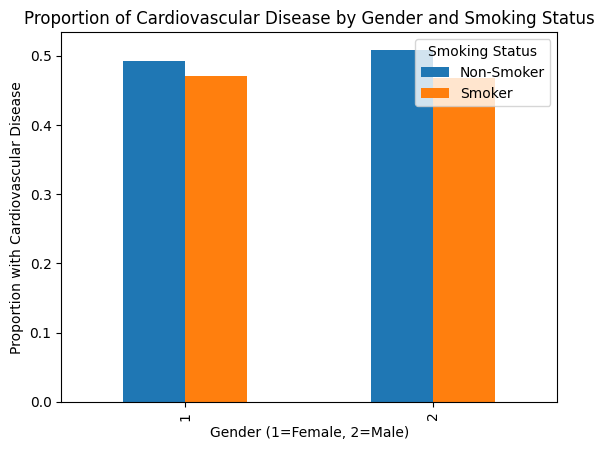

In [32]:
# Get the proportion of cardiovascular disease by gender and smoking status
gender_smoke = med_ex_df.groupby(['gender', 'smoke'])['cardio'].mean()

# Create a DataFrame for visualization
gender_smoke_df = gender_smoke.unstack()

# Plot a stacked bar chart
gender_smoke_df.plot(kind='bar', stacked=False)

# Add labels and title
plt.title('Proportion of Cardiovascular Disease by Gender and Smoking Status')
plt.xlabel('Gender (1=Female, 2=Male)')
plt.ylabel('Proportion with Cardiovascular Disease')
plt.legend(['Non-Smoker', 'Smoker'], title='Smoking Status')

# Show the plot
plt.show()

Modification of Chat GPT: The first suggestion Chat GPT gave to the visualisation of the analysis was a different chart than we have used. To be able to get a better representation of the difference between the genders and the smoke-status, we had to modify the request to Chat GPT, asking for a differnt type of visual tool. The one it provided us with (see above) is a better erpresentation of the analysis we are doing.
The resuts of the analysis on gender and smoke-status show that there is little difference between a smoker and a non-smoker, for both genders, to develop a cardiovascular health decease. The mean show us that the Relative Risk we got from the code (smoker) is what we compare to the number (1) of the non-smoker. Therefore, the results being:
Relative risk for females (smokers vs non-smokers): 0.9562327001163355
Demonstrating that the smoker actually have a tiny bit lower chance of developing cardiovascular heart deseases, if you only compare gender and smoke-status,
and,
Relative risk for males (smokers vs non-smokers): 0.9206270254833326
demonstrating that the male category also have a very low difference, but as shown on the female analysis, the smoker have a littlebit lower chance of developing a cardiovascular heart desease based on smoke-status.
It is important to notice that the Relative Risk is not showing dramatic differences, and that other underlying factors, such as activity-status, alcohol consumption status, blood pressure or your cholesterol level also will affect the chances of developing a cardiovascular heart desease in a different and maybe more noticable way.

## 2) Monika: Demographic and Clinical: example: age group and glucose level
For the analysis of one demographic and one clinical factor group I chose age (or more specific age group) and glucose level.


The data given are following

for age groups - 4 groups: <40, 40-49, 50-59, 60+

for glucose level - 3 levels: 1- normal, 2- above normal, 3 -well above normal

for cardiovascular disease presence: 0 - no disease, 1 - disease

For the analysis  a new dataframe "analysis_2_df" is created with only the age group, the glucose level and the cardiovascular health risk.

In [129]:
#extract the relevant data (id, age, blood pressure category and cardiovascular) from the table med_ex_df_1

#put age_years, gluc and cardio in a seperate table: https://blog.finxter.com/5-best-ways-to-select-multiple-columns-from-a-pandas-dataframe-in-python/
analysis_2_df=med_ex_df[['age_group', 'gluc', 'cardio']]
print(analysis_2_df)

      age_group  gluc  cardio
0         50-59     1       0
1         50-59     1       1
2         50-59     1       1
3         40-49     1       1
4         40-49     1       0
...         ...   ...     ...
69995     50-59     1       0
69996       60+     2       1
69997     50-59     1       1
69998       60+     2       1
69999     50-59     1       0

[68744 rows x 3 columns]


To analyze the correlation of the cardiovascular health with age and glucose,  the data of 'age_group', 'gluc' and 'cardio' is grouped, counted and displayed in a table. Each combination will be treated as a group, showing the distribution of age and glucose combinations on cardiovascular health risk.

In [130]:
#analyze the correlation of the cardiovascular health with age and glucose

# Group the data by age_group, glucose and cardio
grouped_data = analysis_2_df.groupby(['age_group', 'gluc', 'cardio'])

# Calculate the count for each group
age_group_gluc_cardio = grouped_data.size()
age_group_gluc_cardio


<ipython-input-130-f978717f3dba>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = analysis_2_df.groupby(['age_group', 'gluc', 'cardio'])


age_group  gluc  cardio
<40        1     0          1316
                 1           368
           2     0            70
                 1            49
           3     0            39
                 1            22
40-49      1     0         11060
                 1          6186
           2     0           670
                 1           664
           3     0           432
                 1           445
50-59      1     0         14795
                 1         14586
           2     0          1050
                 1          1516
           3     0          1129
                 1          1827
60+        1     0          3476
                 1          6658
           2     0           296
                 1           754
           3     0           395
                 1           941
dtype: int64

The table is not optimal since the age groups, the glucose levels and the cardiovascular health risk are all in rows, making the table very long and unhandy. In the following the table is going to be reshaped.

In [142]:
# Reshape the result
age_group_gluc_cardio_reshaped = age_group_gluc_cardio.unstack(1)

# Display the resulting table
(age_group_gluc_cardio_reshaped)

gluc                  1     2     3
age_group cardio                   
<40       0        1316    70    39
          1         368    49    22
40-49     0       11060   670   432
          1        6186   664   445
50-59     0       14795  1050  1129
          1       14586  1516  1827
60+       0        3476   296   395
          1        6658   754   941

In the table above, the data got split into groups of different ages and glucose levels. It shows the number of people of each group having no cariovascular disease presence (0) or having a cardiovascular disease (1).

 Since it is in absolut numbers and the amount of data varies greatly within the age groups, it is hard to find patterns from this table yet.
Since I didn't know how to further proceed for a good insight, I asked the GenAI assistant from Google colab:

##Gen AI Usage - 3

    1) prompt: How can I make an analysis of the development of cardiovascular health risk based on the tables above

    2) Answer:
    # Assuming 'med_ex_df' is your DataFrame and the necessary columns exist

    # ... (Your existing code for data preprocessing) ...


    # 2) Monika: Demographic and Clinical: example: age group and glucose level

    # ... (Your existing code for creating 'analysis_2_df') ...

    # More detailed analysis of age group and glucose level:

    # Pivot table for better visualization
    pivot_table = pd.pivot_table(analysis_2_df, values='cardio', index='age_group', columns='gluc', aggfunc='mean')

    # Plotting the pivot table
    pivot_table.plot(kind='bar', figsize=(10, 6))
    plt.title('Cardiovascular Disease Risk by Age Group and Glucose Level')
    plt.xlabel('Age Group')
    plt.ylabel('Mean Cardiovascular Disease Risk')
    plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
    plt.legend(title='Glucose Level')
    plt.show()

    # Statistical tests (e.g., chi-squared test or ANOVA) could be applied to
    # determine if there are statistically significant associations between
    # age group, glucose levels, and cardiovascular risk.  

    # Example using chi-squared test (requires contingency table):
    # contingency_table = pd.crosstab(analysis_2_df['age_group'], analysis_2_df['gluc'])
    # from scipy.stats import chi2_contingency
    # chi2, p, dof, expected = chi2_contingency(contingency_table)
    # print(f"Chi-squared test results: Chi2 = {chi2}, p-value = {p}")


    # Further analysis: Consider interactions and subgroups for more detailed insights.
    # For instance, analyzing glucose levels within each age group, or exploring
    # the relationship between age, glucose levels and other risk factors,
    # such as blood pressure or cholesterol.


    3) Effectiveness: yes
    4) Modification needed/implemented: I only need the middle part of the suggested code for my analysis.

        
    # Pivot table for better visualization
    pivot_table = pd.pivot_table(analysis_2_df, values='cardio', index='age_group', columns='gluc', aggfunc='mean')

    # Plotting the pivot table
    pivot_table.plot(kind='bar', figsize=(10, 6))
    plt.title('Cardiovascular Disease Risk by Age Group and Glucose Level')
    plt.xlabel('Age Group')
    plt.ylabel('Mean Cardiovascular Disease Risk')
    plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
    plt.legend(title='Glucose Level')
    plt.show()

As suggested by the AI tool, the table analysis_2_df dataframe is used for a better analysis of the data. From the dataframe, the cardio values are aggregated and the mean of the cardio values for each combination of 'age_group' and 'gluc' are calculated. The new table will have age groups as rows and glucose levels as columns.

In [92]:
# Pivot table for better visualization
pivot_table = pd.pivot_table(analysis_2_df, values='cardio', index='age_group', columns='gluc', aggfunc='mean')
pivot_table

<ipython-input-92-1a7567d98e2f>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(analysis_2_df, values='cardio', index='age_group', columns='gluc', aggfunc='mean')


gluc,1,2,3
age_group,,,
<40,0.218527,0.411765,0.360656
40-49,0.358692,0.497751,0.507412
50-59,0.496443,0.590803,0.618065
60+,0.656996,0.718095,0.704341


The table now shows the correlation of age groups and glucose levels with the development of cardiovascular diseases. The higher the number, the more likely people from his combination group are to develop a cardiovascular health disease. In a next step, this table is converted into a grouped bar chart for better insights.

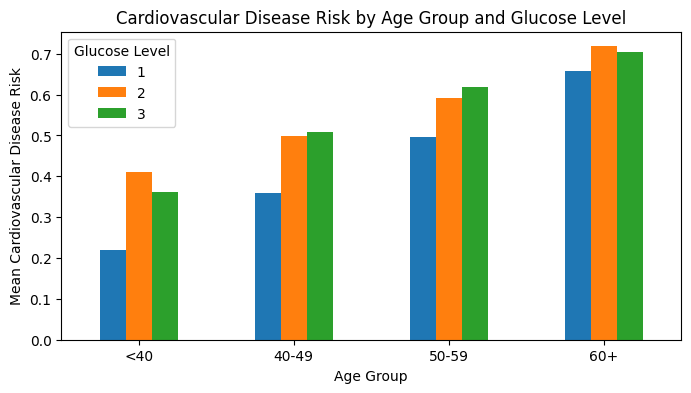

In [144]:
# Plotting the pivot table
pivot_table.plot(kind='bar', figsize=(8, 4))
plt.title('Cardiovascular Disease Risk by Age Group and Glucose Level')
plt.xlabel('Age Group')
plt.ylabel('Mean Cardiovascular Disease Risk')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Glucose Level')
plt.show()



The above graph enables a better analysis of the relationship between age and glucose level with the presence of cardiovascular disease.
First of all, it is noticable that the overall disease presence is increasing with the age group, independently from the glucose level.
The glucose level plays also a role in the development of cardiovascular health. Dominantly in the youngest age group (<40) people with a normal glucose level are the least likely to develop a disease. The risk almost doubles with hightened glucose levels, while in this age group, the glucose level 2 shows a slightly higher risk than level 3. With the increasing age groups the difference between different glucose levels decreases. For the age groups of 40-49 and 50-59, the presence of a cardiovascular health disease increases  


# 3) Iman: Demographic + Clinical + Lifestyle


### Gender + Glucose + Alcohol Consumption

In [ ]:
# Create a new column 'gender_label' with the mapped values
med_ex_df['gender_label'] = med_ex_df['gender'].map({1: 'Female', 2: 'Male'})

# Verify the new column
print(med_ex_df[['gender', 'gender_label']].head())  # Display first few rows to check

   gender gender_label
0       2         Male
1       1       Female
2       1       Female
3       2         Male
4       1       Female


In [ ]:
# Map the 'gluc' column (1: normal, 2: above normal, 3: well above normal)
med_ex_df['gluc_label'] = med_ex_df['gluc'].map({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})

# Map the 'alco' column (0: non-drinker, 1: drinker)
med_ex_df['alco_label'] = med_ex_df['alco'].map({0: 'Non-Drinker', 1: 'Drinker'})

# Verify the changes
print(med_ex_df[['gluc', 'gluc_label', 'alco', 'alco_label']].head())


   gluc gluc_label  alco   alco_label
0     1     Normal     0  Non-Drinker
1     1     Normal     0  Non-Drinker
2     1     Normal     0  Non-Drinker
3     1     Normal     0  Non-Drinker
4     1     Normal     0  Non-Drinker


In [ ]:
med_ex_df.head()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group,gender_label
0,0,18393,2,110,80,1,1,0,0,1,0,50,50-59,Male
1,1,20228,1,140,90,3,1,0,0,1,1,55,50-59,Female
2,2,18857,1,130,70,3,1,0,0,0,1,51,50-59,Female
3,3,17623,2,150,100,1,1,0,0,1,1,48,40-49,Male
4,4,17474,1,100,60,1,1,0,0,0,0,47,40-49,Female


In [ ]:
med_ex_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69989 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            69989 non-null  int64   
 1   age           69989 non-null  int64   
 2   gender        69989 non-null  int64   
 3   ap_hi         69989 non-null  int64   
 4   ap_lo         69989 non-null  int64   
 5   cholesterol   69989 non-null  int64   
 6   gluc          69989 non-null  int64   
 7   smoke         69989 non-null  int64   
 8   alco          69989 non-null  int64   
 9   active        69989 non-null  int64   
 10  cardio        69989 non-null  int64   
 11  age_year      69989 non-null  int64   
 12  age_group     69989 non-null  category
 13  gender_label  69989 non-null  object  
dtypes: category(1), int64(12), object(1)
memory usage: 7.5+ MB


In [ ]:
grouped = med_ex_df.groupby(['gluc', 'alco', 'gender_label', 'cardio']).size().reset_index(name='count')

# Display the result
print(grouped)

    gluc  alco gender_label  cardio  count
0      1     0       Female       0  19663
1      1     0       Female       1  17886
2      1     0         Male       0   9541
3      1     0         Male       1   9296
4      1     1       Female       0    491
5      1     1       Female       1    423
6      1     1         Male       0   1192
7      1     1         Male       1    976
8      2     0       Female       0   1370
9      2     0       Female       1   1899
10     2     0         Male       0    587
11     2     0         Male       1    924
12     2     1       Female       0     61
13     2     1       Female       1     86
14     2     1         Male       0     94
15     2     1         Male       1    169
16     3     0       Female       0   1294
17     3     0       Female       1   2249
18     3     0         Male       0    618
19     3     0         Male       1    898
20     3     1       Female       0     30
21     3     1       Female       1     70
22     3   

In [ ]:

# counting the numbers of each combination where cardiovascular disease is present

# Group by 'gluc', 'alco', 'gender_label', and 'cardio', then count the occurrences
grouped = med_ex_df.groupby(['gluc', 'alco', 'gender_label', 'cardio']).size().reset_index(name='count')

# Filter to show only rows where cardio = 1
grouped_cardio_1 = grouped[grouped['cardio'] == 1]

# Display the result
print(grouped_cardio_1)


    gluc  alco gender_label  cardio  count
1      1     0       Female       1  17886
3      1     0         Male       1   9296
5      1     1       Female       1    423
7      1     1         Male       1    976
9      2     0       Female       1   1899
11     2     0         Male       1    924
13     2     1       Female       1     86
15     2     1         Male       1    169
17     3     0       Female       1   2249
19     3     0         Male       1    898
21     3     1       Female       1     70
23     3     1         Male       1     99


From this, it can be seen that the combination of gender, alcohol consumption and glucose level with the highest presence of cardiovascular disease is in females who are non-drinkers and with normal glucose levels.

This is followed by males who are non-drinkers with normal glucose levels. However, the difference is nearly 9000 less than with females.

In [ ]:

# counting the number of each combination where cardiovascular disease is not present

# Group by 'gluc', 'alco', 'gender_label', and 'cardio', then count the occurrences
grouped = med_ex_df.groupby(['gluc', 'alco', 'gender_label', 'cardio']).size().reset_index(name='count')

# Filter to show only rows where cardio = 1
grouped_cardio_1 = grouped[grouped['cardio'] == 0]

# Display the result
print(grouped_cardio_1)

    gluc  alco gender_label  cardio  count
0      1     0       Female       0  19663
2      1     0         Male       0   9541
4      1     1       Female       0    491
6      1     1         Male       0   1192
8      2     0       Female       0   1370
10     2     0         Male       0    587
12     2     1       Female       0     61
14     2     1         Male       0     94
16     3     0       Female       0   1294
18     3     0         Male       0    618
20     3     1       Female       0     30
22     3     1         Male       0     73


From this we can see that the highest combination without cardiovascular disease present is also with females with normal glucose levels that are non-drinkers. In fact, with this combination the number without the presence of cardiovascular disease is approximately 2000 more than the number with the presence. We can conclude that the data happens to have a high number of females with normal glucose levels and are not drinkers, followed by males with the same clinical and lifestyle values.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd



# Pivot data for stacked bar chart
pivot_table = grouped.pivot_table(index=['gluc_label', 'alco_label'], columns='gender_label', values='count')

# Plot stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Cardiovascular Disease by Glucose Level, Alcohol Consumption, and Gender')
plt.xlabel('Glucose Level and Alcohol Consumption (0=Non-Drinker, 1=Drinker)')
plt.ylabel('Count of Individuals with Cardiovascular Disease')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()


KeyError: 'gluc_label'

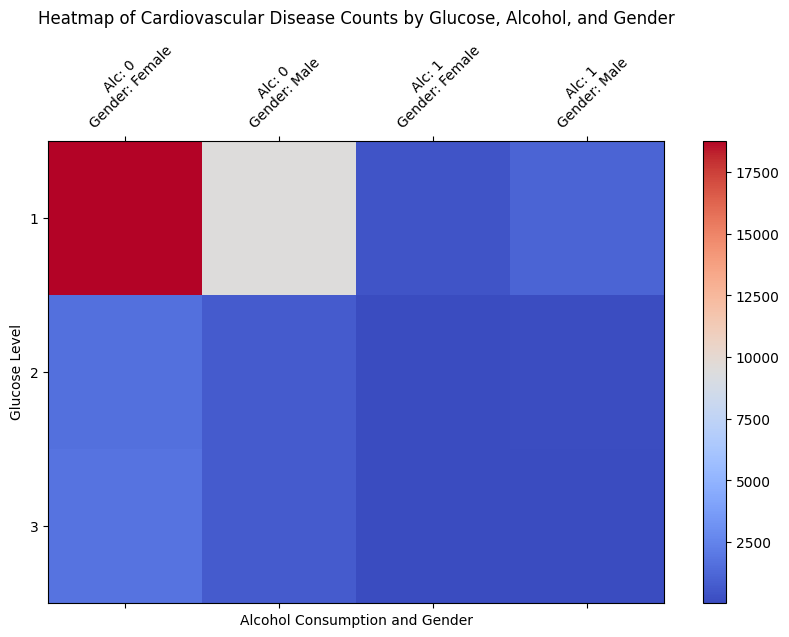

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'df_grouped' is your grouped data

# Prepare data for heatmap
heatmap_data = grouped.pivot_table(index='gluc', columns=['alco', 'gender_label'], values='count').fillna(0)

# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.matshow(heatmap_data, cmap='coolwarm')

# Add color bar
fig.colorbar(cax)

# Set labels
ax.set_xticks(np.arange(len(heatmap_data.columns)))
ax.set_xticklabels([f"Alc: {alco}\nGender: {gender}" for alco, gender in heatmap_data.columns], rotation=45)
ax.set_yticks(np.arange(len(heatmap_data.index)))
ax.set_yticklabels(heatmap_data.index)

plt.title('Heatmap of Cardiovascular Disease Counts by Glucose, Alcohol, and Gender')
plt.xlabel('Alcohol Consumption and Gender')
plt.ylabel('Glucose Level')

plt.show()

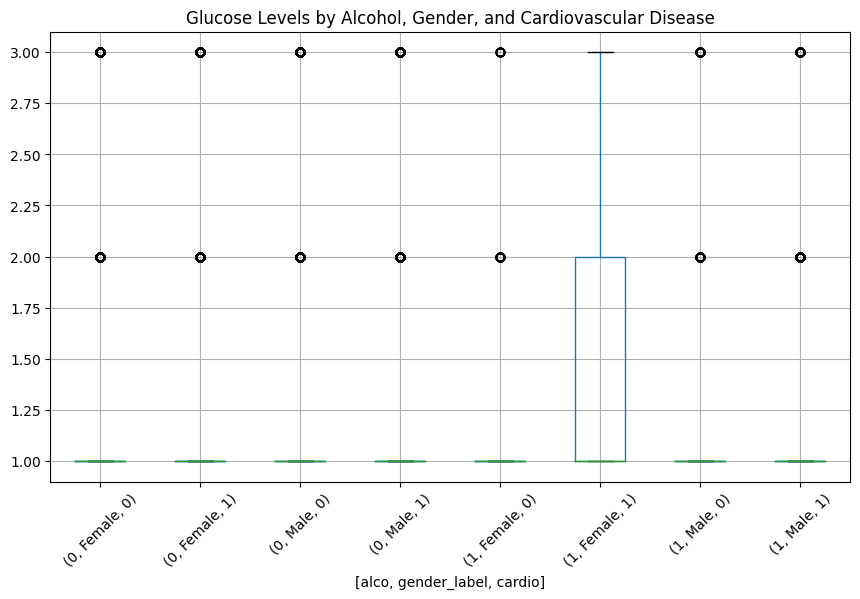

In [ ]:
med_ex_df.boxplot(column='gluc', by=['alco', 'gender_label', 'cardio'], figsize=(10, 6))
plt.title('Glucose Levels by Alcohol, Gender, and Cardiovascular Disease')
plt.suptitle('')
plt.xticks(rotation=45)
plt.show()


##6. Test solution with a variety of data

## Reflection
How did the use of Gen AI affect (positive and negative) your work on this assignemnt?